# The Elias Gamma Code

The Elias gamma code is a universal, prefix-free code for encoding positive integers. We denote the Elias gamma codeword of a positive integer $n$ by $\gamma(n)$.

For a positive integer $n$, the Elias gamma code $\gamma(n)$ is constructed as follows:

1. Let $b = \text{binary}(n)$ without leading zeros.
2. Let $L = \text{len}(b)$.
3. Output $(L-1)$ zeros followed by $b$.

Example:

- $\gamma(1) = 1$
- $\gamma(4) = 00\_100 = 00100$
- $\gamma(9) = 000\_1001 = 0001001$

*Note: The underscores in the above examples are included only for readability to separate pieces of the codewords; they are not part of the actual codewords.*

In this notebook, we'll implement encoding, decoding, and length functions for the Elias gamma code.

# Imports

In [1]:
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display

# Function Definitions

In this section, we define the core functions for Elias gamma coding:

- `gamma_encode`
- `gamma_decode`
- `gamma_length`
- `gamma_implied_probability`

These functions form the foundation for encoding, decoding, and analyzing unary codes throughout this demo.

## `gamma_encode`

Encode a positive integer or a sequence of positive integers using Elias gamma coding.

In [2]:
def gamma_encode(numbers, collapse=True):
    if isinstance(numbers, int):
        number = numbers
        if number <= 0:
            raise ValueError("Number must be positive")
        binary = bin(number)[2:]
        length = len(binary)
        return "0" * (length - 1) + binary

    try:
        encoded = [gamma_encode(number) for number in numbers]
        return "".join(encoded) if collapse else encoded
    except TypeError:
        raise ValueError("Input must be a positive integer or an iterable of positive integers")

## `gamma_decode`

Decode a Elias gamma codeword or a sequence of codewords into their corresponding positve integers.

In [3]:
def gamma_decode(code, as_list=False):
    results = []

    index = 0
    while index < len(code):
        zeros = 0
        while index < len(code) and code[index] == "0":
            zeros += 1
            index += 1
        if index >= len(code):
            raise ValueError("Malformed Elias gamma code: missing binary prefix")

        length = zeros + 1  # length of full binary number
        if index + length > len(code):
            raise ValueError("Malformed code: not enough bits for the full number")

        binary = code[index : index+length]
        number = int(binary, 2)
        results.append(number)
        index += length

    return results if as_list or len(results) > 1 else results[0]

## `gamma_length`

Return the length of the Elias gamma codeword for a positve integer.

In [4]:
def gamma_length(numbers, as_list=False):
    def length(number):
        if number <= 0:
            raise ValueError("Number must be positive")
        return int(2 * np.floor(np.log2(number)) + 1)

    if isinstance(numbers, int):
        return length(numbers) if not as_list else [length(numbers)]

    try:
        return [length(number) for number in numbers]
    except TypeError:
        raise ValueError("Input must be a positive integer or an iterable of positive integers")

## `gamma_implied_probability`

Compute the implied probability of Elias gamma codewords.

In [5]:
def gamma_implied_probability(numbers, as_list=False):
    def prob(number):
        if number <= 0:
            raise ValueError("Number must be positive")
        return np.exp2(-gamma_length(number))

    if isinstance(numbers, int):
        return [prob(numbers)] if as_list else prob(numbers)

    try:
        probabilities = [prob(n) for n in numbers]
        return probabilities
    except TypeError:
        raise ValueError("Input must be a positive integer or an iterable of positive integers")

# Encoding / Decoding Example

We encode several positive integers, decode them, and compute code lengths.

In [6]:
numbers = [1, 2, 3, 5, 8, [3,2], [2,3,5]]
encoded = [gamma_encode(number) for number in numbers]
decoded = [gamma_decode(code) for code in encoded]
lengths = [gamma_length(number) for number in numbers]
probs = [gamma_implied_probability(number) for number in numbers]

results_df = pd.DataFrame(
    list(zip(encoded, decoded, lengths, probs)),
    index=pd.Index(numbers, name="Message"),
    columns=[
        "Elias Gamma Codeword", "Decoded", "Codeword Length(s)", "Probability (Implied)"
    ]
)

with pd.option_context("display.max_rows", None, "display.max_columns", None):
    display(results_df)

,Elias Gamma Codeword,Decoded,Codeword Length(s),Probability (Implied)
Message,,,,
1,1,1,1,0.5
2,010,2,3,0.125
3,011,3,3,0.125
5,00101,5,5,0.03125
8,0001000,8,7,0.007812
"[3, 2]",011010,"[3, 2]","[3, 3]","[0.125, 0.125]"
"[2, 3, 5]",01001100101,"[2, 3, 5]","[3, 3, 5]","[0.125, 0.125, 0.03125]"


## Visualizing Gamma Code Lengths

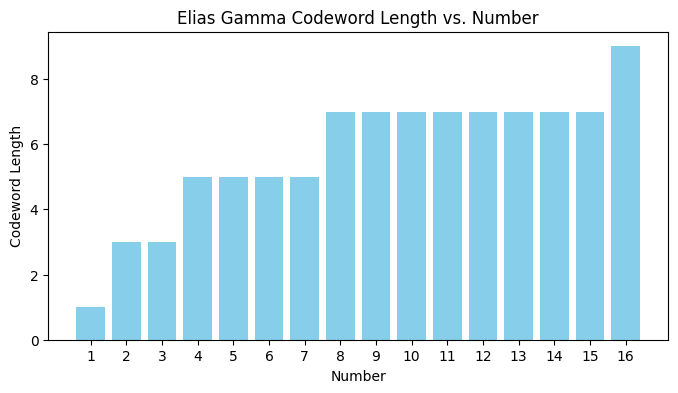

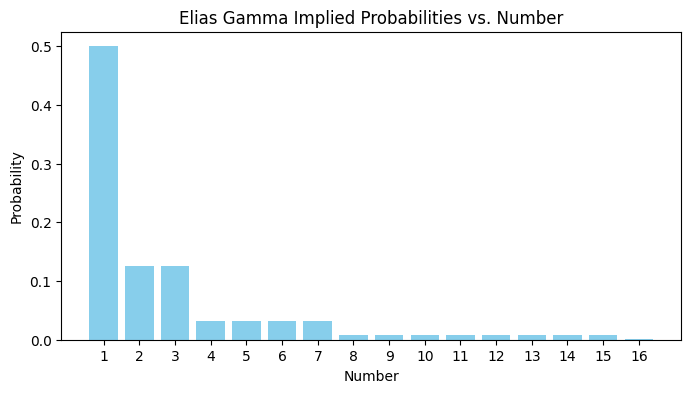

In [7]:
numbers = list(range(1, 17))
code_lengths = [gamma_length(number) for number in numbers]
probs = [gamma_implied_probability(number) for number in numbers]

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(numbers, code_lengths, color="skyblue")
ax.set_xlabel("Number")
ax.set_ylabel("Codeword Length")
ax.set_title("Elias Gamma Codeword Length vs. Number")
ax.set_xticks(numbers)
plt.show()

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(numbers, probs, color="skyblue")
ax.set_xlabel("Number")
ax.set_ylabel("Probability")
ax.set_title("Elias Gamma Implied Probabilities vs. Number")
ax.set_xticks(numbers)
plt.show()

### Notes
- Elias gamma coding is a universal code and more efficient than unary for large numbers.
- It is a prefix code and uniquely decodable.
- Useful in Elias delta coding, Golomb coding, and variable-length prefix code systems.